In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("sample.csv")

train["indexes"] = train.index
test["indexes"] = test.index + 35064

print("Train DataFrame")
print(train)

Train DataFrame
                  datetime        total  indexes
0      01.01.2005 00:00:00          NaN        0
1      01.01.2005 01:00:00  154139.8084        1
2      01.01.2005 02:00:00  157818.3593        2
3      01.01.2005 03:00:00  149310.6991        3
4      01.01.2005 04:00:00  138282.0380        4
...                    ...          ...      ...
35059  31.12.2008 19:00:00  249376.3608    35059
35060  31.12.2008 20:00:00  246510.5725    35060
35061  31.12.2008 21:00:00  226469.4133    35061
35062  31.12.2008 22:00:00  199907.3942    35062
35063  31.12.2008 23:00:00  151086.2414    35063

[35064 rows x 3 columns]


In [ ]:
print("Test DataFrame")
print(test)

Test DataFrame
                 datetime  total  indexes
0     01.01.2009 00:00:00      0    35064
1     01.01.2009 01:00:00      0    35065
2     01.01.2009 02:00:00      0    35066
3     01.01.2009 03:00:00      0    35067
4     01.01.2009 04:00:00      0    35068
...                   ...    ...      ...
4339  30.06.2009 19:00:00      0    39403
4340  30.06.2009 20:00:00      0    39404
4341  30.06.2009 21:00:00      0    39405
4342  30.06.2009 22:00:00      0    39406
4343  30.06.2009 23:00:00      0    39407

[4344 rows x 3 columns]


In [ ]:
train.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35064 non-null  object 
 1   total     34946 non-null  float64
 2   indexes   35064 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1 MB


In [ ]:
test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  4344 non-null   object
 1   total     4344 non-null   int64 
 2   indexes   4344 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 390.4 KB


In [ ]:
train.isna().sum()

datetime      0
total       118
indexes       0
dtype: int64

In [ ]:
train["total"] = train["total"].fillna(value=train["total"].mean())
train.isna().sum()

datetime    0
total       0
indexes     0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

x = train["indexes"].values.reshape(-1, 1)
y = train["total"].values

slr = LinearRegression()
slr.fit(x, y)
y_predictions = slr.predict(x)

print("Slope:", *slr.coef_)
print("Intercept:", slr.intercept_)

Slope: -0.9207216302329595
Intercept: 201266.1740193778


In [ ]:
print(f'straight line equation: y = {slr.intercept_} + ({slr.coef_}) * x')

straight line equation: y = 201266.1740193778 + ([-0.92072163]) * x


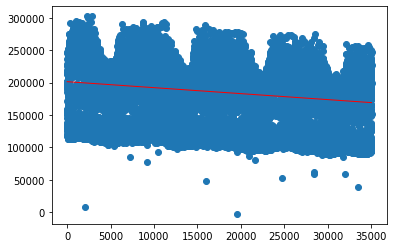

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, slr.predict(x), color="red", linewidth=1)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_predictions)))
print('MAE: {:.3f}'.format(mean_absolute_error(y, y_predictions)))

MSE: 1983334462.132
MAE: 36556.506


In [ ]:
x = test["indexes"].values.reshape(-1, 1)
test["total"] = slr.predict(x)
test = test.drop(columns=["indexes"])
print(test)

                 datetime          total
0     01.01.2009 00:00:00  168981.990777
1     01.01.2009 01:00:00  168981.070055
2     01.01.2009 02:00:00  168980.149334
3     01.01.2009 03:00:00  168979.228612
4     01.01.2009 04:00:00  168978.307890
...                   ...            ...
4339  30.06.2009 19:00:00  164986.979623
4340  30.06.2009 20:00:00  164986.058902
4341  30.06.2009 21:00:00  164985.138180
4342  30.06.2009 22:00:00  164984.217458
4343  30.06.2009 23:00:00  164983.296737

[4344 rows x 2 columns]


In [ ]:
test.to_csv("Electricity_predictions_2009.csv", index=False)
files.download("Electricity_predictions_2009.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>